# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [3]:
data = pd.read_csv('winequality-white.csv',delimiter = ';')
X = data.drop(columns = ['quality'])
Y = data.quality


# Binarization of Y

In [4]:
Y = Y.values
for i in range(Y.shape[0]):
    if Y[i]>7:
        Y[i] = 1
    else:
        Y[i] = 0
Y = pd.Series(Y)

# Spliting Data into tarining and testing data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3 , stratify = Y , random_state = 2)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

(3428, 11)
(1470, 11)
(3428,)
(1470,)


# Perceptron Model

In [37]:
class Perceptron:
    
    def __init__(self):
        self.W = None
        self.b = None
        
        
    def model(self,x):
        return 1 if (np.dot(self.W,x) >= self.b) else 0
        
    def predict(self,X):
        Y = []
        
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self,X,Y,epoch = 1,lr =1):
        
        self.W = np.zeros(X.shape[1])
        self.b = 0
        accuracy = []
        max_accuracy = 0
        wt_matrix = []
        
        for i in range(epoch):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y_pred == 0 and y == 1:
                    self.W += lr * x
                    self.b += lr * 1
                elif y_pred == 1 and y == 0:
                    self.W -= lr * x
                    self.b -= lr * 1
                    
            wt_matrix.append(self.W)
            accuracy.append(accuracy_score(self.predict(X),Y))
            
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                chkptw = self.W
                chkptb = self.b
                
        print(max_accuracy)
        
        self.W = chkptw
        self.b = chkptb
        plt.plot(accuracy)
        plt.ylim(0,1)
        plt.show()
        
        return np.array(wt_matrix)
        


In [38]:
perceptron = Perceptron()

0.9632438739789965


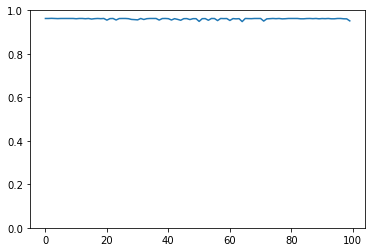

In [39]:
wt_matrix = perceptron.fit(x_train,y_train,100,0.001)


In [40]:
y_pred_test = perceptron.predict(x_test)
print(accuracy_score(y_pred_test,y_test))

0.9537414965986395
